In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

#Overall Results

The 2 tables below represent the final results of the 3 simulations based on the previously defined metrics. The first table shows the mean and the second is the standard deviation for each simulation. 

In [5]:
groupedData = pd.read_json('groupedResults.txt')
#display(pd.DataFrame(groupedData['simulation1']))

final_table_mean,final_table_std = [],[]

for key in groupedData.keys():
  row_mean,row_std = [],[]
  for key2 in groupedData[key].keys():
    row_mean.append(groupedData[key][key2]['mean'])
    row_std.append(groupedData[key][key2]['std'])
  final_table_mean.append(row_mean)
  final_table_std.append(row_std)

final_table_mean_dp = pd.DataFrame(final_table_mean,columns=['accuracy','recall','precision','time_used'],index=['simulation_1','simulation_2','simulation_3'])
final_table_std_dp = pd.DataFrame(final_table_std,columns=['accuracy','recall','precision','time_used'],index=['simulation_1','simulation_2','simulation_3'])


display(final_table_mean_dp)
display(final_table_std_dp)


,accuracy,recall,precision,time_used
simulation_1,0.860021,0.866909,0.856993,232.037509
simulation_2,0.869384,0.877866,0.862300,1119.870169
simulation_3,0.871218,0.897025,0.863100,311.187758


,accuracy,recall,precision,time_used
simulation_1,0.019005,0.063669,0.057634,7.763963
simulation_2,0.033502,0.026015,0.059203,267.034836
simulation_3,0.053423,0.048856,0.092807,62.711640


#Creating the graphs for loss and accuracy

In [12]:
simulation1 = pd.read_json('simulation1.txt')
simulation2 = pd.read_json('simulation2.txt')
simulation3 = pd.read_json('simulation3.txt')

data1 = simulation1.drop(['accuracy','recall','precision','time_used_to_train','epochs','all_epochs'],axis=1)
data2 = simulation2.drop(['accuracy','recall','precision','time_used_to_train','epochs','all_epochs'],axis=1)
data3 = simulation3.drop(['accuracy','recall','precision','time_used_to_train','epochs','all_epochs'],axis=1)

display(data2['graph_loss'])

0    [0.7580578327178951, 0.7093845605850221, 0.599...
1    [0.7453925609588621, 0.614268362522125, 0.5139...
2    [0.7316092848777771, 0.6368914246559141, 0.423...
3    [0.8005569577217101, 0.5743524432182311, 0.521...
4    [2.014487266540527, 0.5032240152359, 0.4033108...
Name: graph_loss, dtype: object

current simulation0
current folder:0


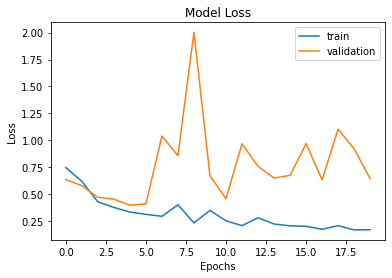

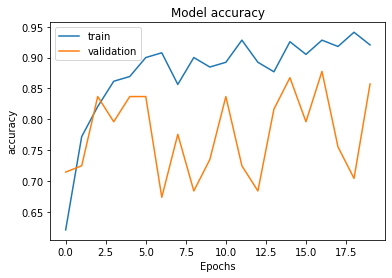

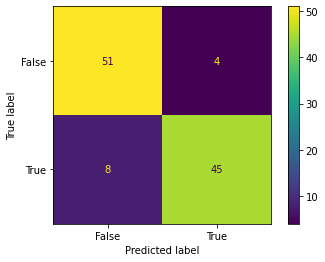

current simulation0
current folder:1


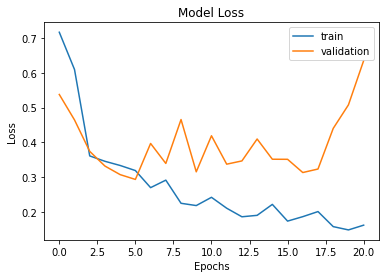

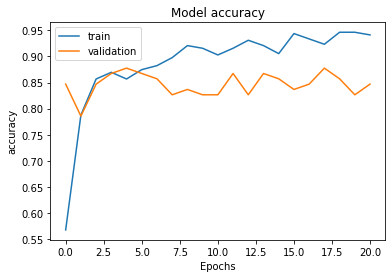

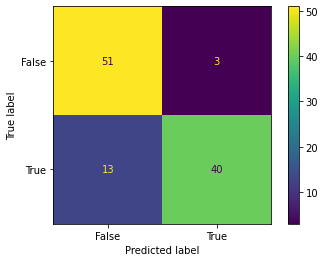

current simulation0
current folder:2


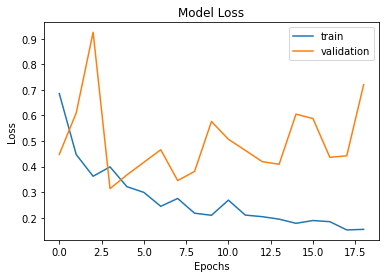

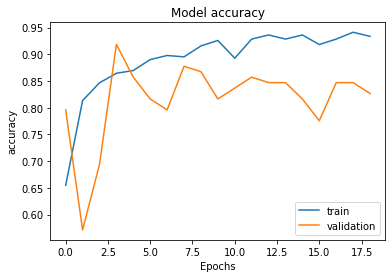

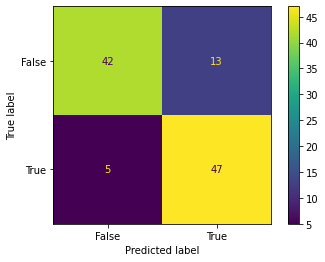

current simulation0
current folder:3


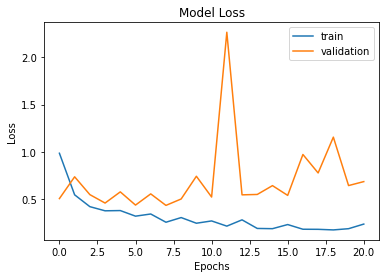

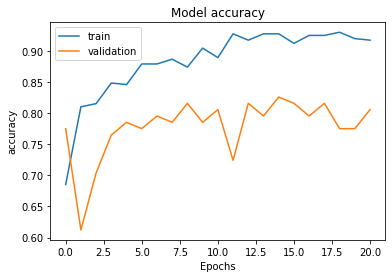

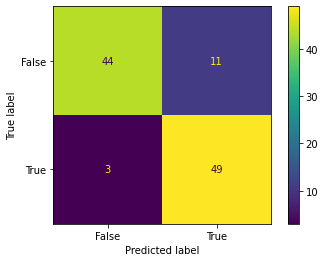

current simulation0
current folder:4


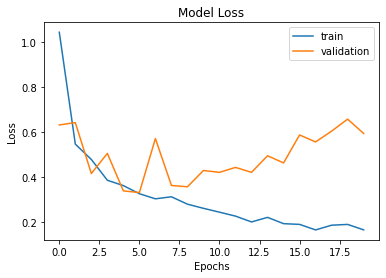

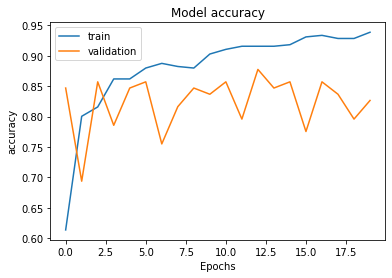

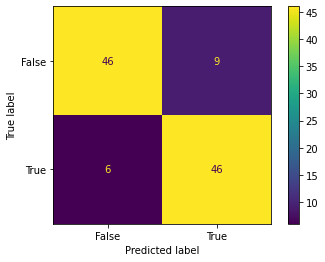

current simulation1
current folder:0


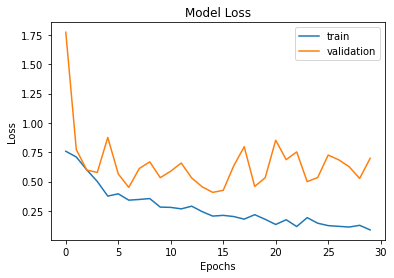

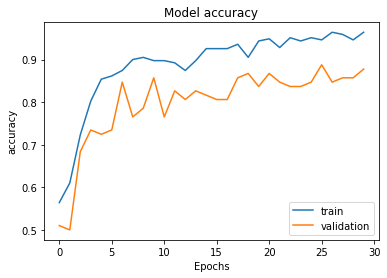

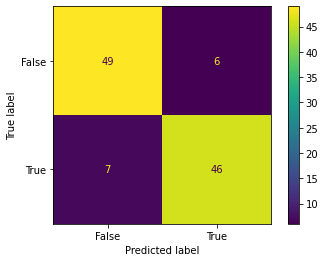

current simulation1
current folder:1


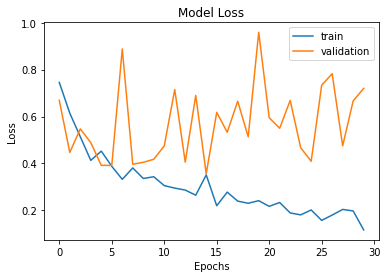

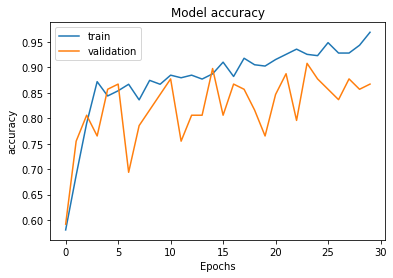

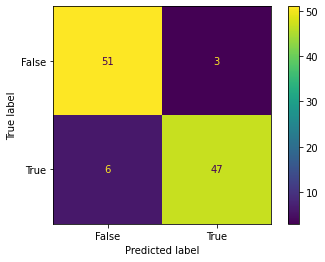

current simulation1
current folder:2


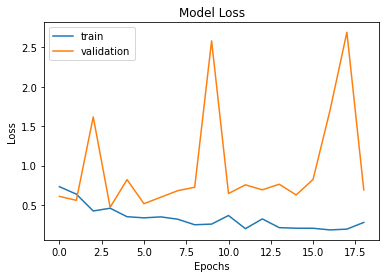

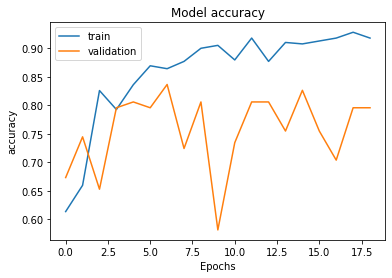

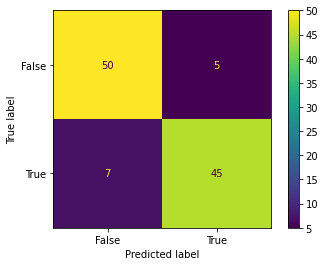

current simulation1
current folder:3


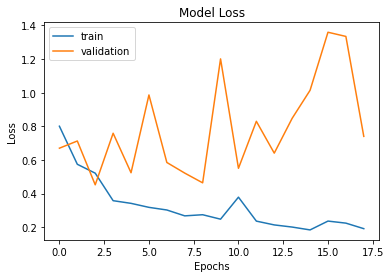

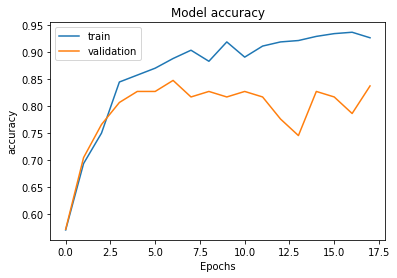

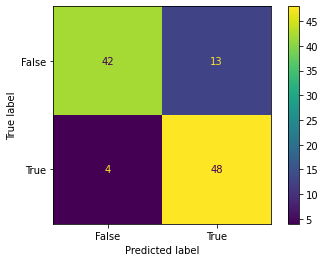

current simulation1
current folder:4


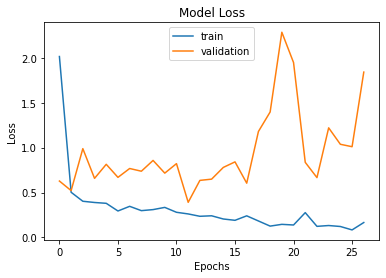

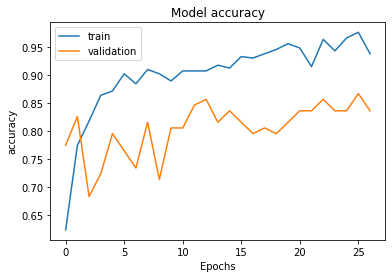

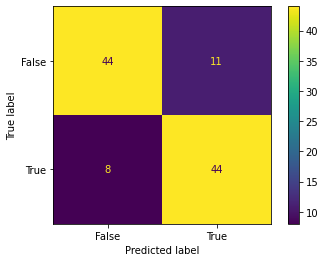

current simulation2
current folder:0


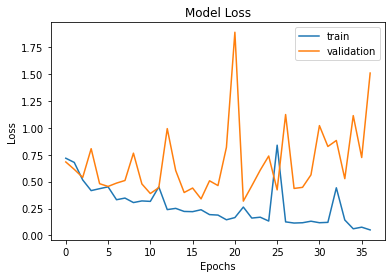

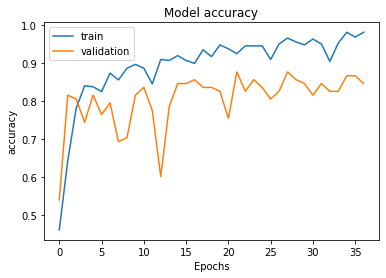

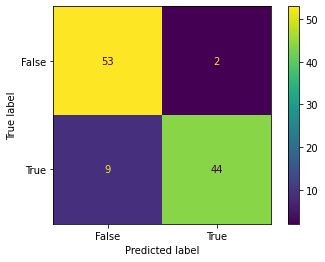

current simulation2
current folder:1


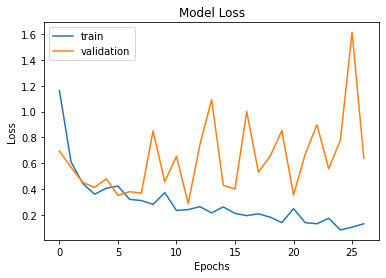

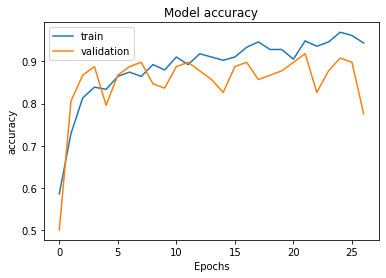

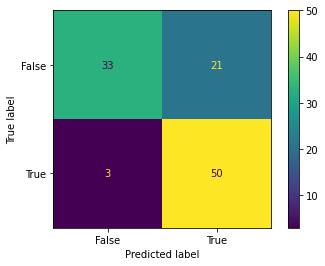

current simulation2
current folder:2


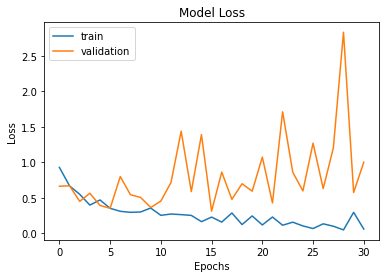

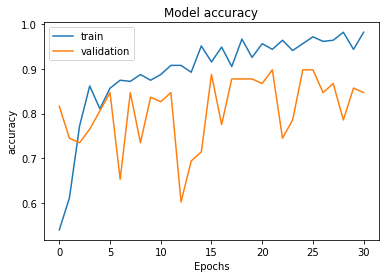

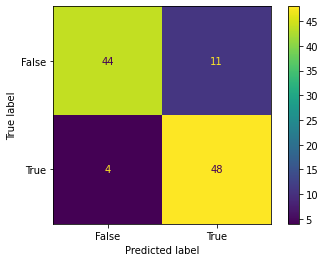

current simulation2
current folder:3


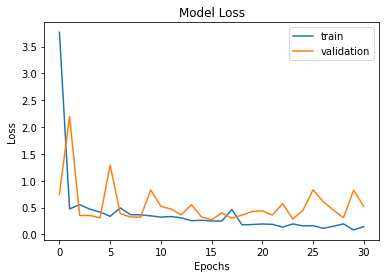

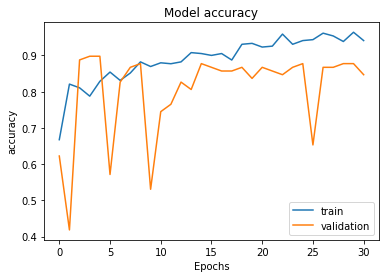

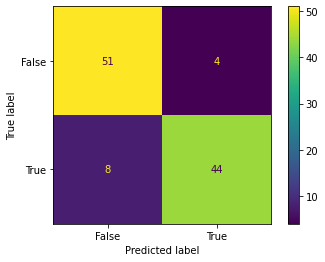

current simulation2
current folder:4


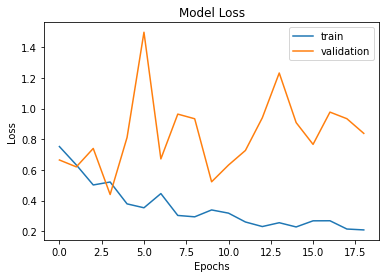

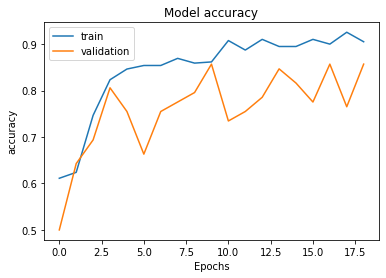

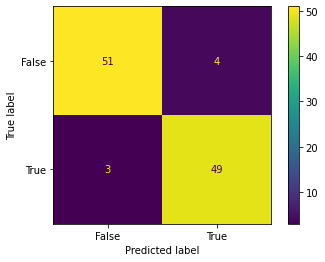

In [14]:


def show_graphs(curve1,curve2,title,xlabel,ylabel,x_dot=None,y_dot=None):

  plt.plot(curve1)
  plt.plot(curve2)
  plt.title(f'Model {title}')
  plt.ylabel(xlabel)
  plt.xlabel(ylabel)
  plt.legend(['train', 'validation'])
  plt.show()


all_simulations = [data1,data2,data3]

for index,simulation_data in enumerate(all_simulations):  

  for folder in range(len(data1)):
    print('current simulation'+str(index))
    print('current folder:'+str(folder))
    show_graphs(simulation_data['graph_loss'][folder],simulation_data['graph_val_loss'][folder],'Loss','Loss','Epochs')
    show_graphs(simulation_data['graph_accuracy'][folder],simulation_data['graph_val_accuracy'][folder],'accuracy','accuracy','Epochs')
    
    confusion_matrix = metrics.confusion_matrix(simulation_data['actual_values'][folder], simulation_data['predicted_values'][folder])
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
  
    plt.show()
